# PROJECT (GROUP 6)(WEDNESDAY BATCH)

#TEAM MEMBERS:
#1.Veena Ahir (1001771342)
#2.Kurmapu Satya Prasad(1001722452)
#3.Nithya Balasundar(1001763661)


# Implementing Sentiment Analysis of movie reviews using Naive Bayes Algorithm

In [1]:
#Importing all the necessary libraries 
import glob
import os
import random
import re
import string
#Library for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.simplefilter('ignore')
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
#Natural Language Toolkit library for text processing 

nltk.download(['words', 'stopwords'], quiet=True)

True

In [30]:
#Merge all the train files in the negative and positive folder
train_liSt_new = []
for root, dirs, files in os.walk('D:/Subjects/Subjects/ML/Project/aclImdb/train/neg'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), encoding="utf8") as f:
                text = f.read()
                train_liSt_new.append(text)
                
for root, dirs, files in os.walk('D:/Subjects/Subjects/ML/Project/aclImdb/train/pos'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), encoding="utf8") as f:
                text = f.read()
                train_liSt_new.append(text)
#Printing the number of reviews in the train folder 
len(train_liSt_new)


25000

In [31]:
#Merge all the test files in the negative and positive folder 
test_lisT_new = []
for root, dirs, files in os.walk('D:/Subjects/Subjects/ML/Project/aclImdb/test/neg'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), encoding="utf8") as f:
                text = f.read()
                test_lisT_new.append(text)
                
for root, dirs, files in os.walk('D:/Subjects/Subjects/ML/Project/aclImdb/test/pos'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), encoding="utf8") as f:
                text = f.read()
                test_lisT_new.append(text)
#Printing the number of reviews in the test folder
len(test_lisT_new)


25000

In [32]:
#Creating a dataframe for the train data
train_file_3 = [os.path.splitext(filename)[0] for filename in os.listdir('D:/Subjects/Subjects/ML/Project/aclImdb/train/neg')]
train_file_4 = [os.path.splitext(filename)[0] for filename in os.listdir('D:/Subjects/Subjects/ML/Project/aclImdb/train/pos')]
train_files = train_file_3+train_file_4
import pandas as pd 
df_new = pd.DataFrame({'File': train_files}) 
new_data = df_new.File.str.split('_').values.tolist()
df_new2 =pd.DataFrame(new_data)
df_new2['review'] = train_liSt_new
train_data = df_new2.rename(columns={0: "reviewId", 1: "Sentiment"})
train_data["p_pos"] = np.nan
train_data["p_neg"] = np.nan
train_data["predicted_sentiment"] = ""
train_dataFG = train_data.copy()



In [33]:
#Creating a dataframe for the test data
test_file_1 = [os.path.splitext(filename)[0] for filename in os.listdir('D:/Subjects/Subjects/ML/Project/aclImdb/test/neg')]
test_file_2 = [os.path.splitext(filename)[0] for filename in os.listdir('D:/Subjects/Subjects/ML/Project/aclImdb/test/pos')]
test_Files = test_file_1+test_file_2
import pandas as pd 
df1 = pd.DataFrame({'File': test_Files}) 
data1 = df1.File.str.split('_').values.tolist()
df_new1 =pd.DataFrame(data1)
df_new1['review'] = test_lisT_new
test_data = df_new1.rename(columns={0: "reviewId", 1: "Sentiment"})
test_data["p_pos"] = np.nan
test_data["p_neg"] = np.nan
test_data["predicted_sentiment"] = ""
test_dataFG = test_data.copy()

# FINE GRAINING APPROACH

In [34]:
#Define a function to classify the reviews based on polarity 
def get_polarityFG(data):
    if (data['Sentiment'] == '0') | (data['Sentiment'] == '1') | (data['Sentiment'] == '2'):
        return 'negative'
    elif (data['Sentiment'] == '3') | (data['Sentiment'] == '4'):
        return 'somewhat negative'
    elif (data['Sentiment'] == '5'):
        return 'neuteral'
    elif (data['Sentiment'] == '6') | (data['Sentiment'] == '7'):
        return 'somewhat positive'
    elif (data['Sentiment'] == '8') | (data['Sentiment'] == '9') | (data['Sentiment'] == '10'):
        return 'positive'

framesFG = [train_dataFG, test_dataFG]
dataFG = pd.concat(framesFG)  
dataFG['Polarity'] = dataFG.apply(get_polarityFG,axis=1)
dataFG

,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,Polarity
0,0,3,Story of a man who has unnatural feelings for ...,NaN,NaN,,somewhat negative
1,10000,4,Airport '77 starts as a brand new luxury 747 p...,NaN,NaN,,somewhat negative
2,10001,4,This film lacked something I couldn't put my f...,NaN,NaN,,somewhat negative
3,10002,1,"Sorry everyone,,, I know this is supposed to b...",NaN,NaN,,negative
4,10003,1,When I was little my parents took me along to ...,NaN,NaN,,negative
...,...,...,...,...,...,...,...
24995,9998,8,I was extraordinarily impressed by this film. ...,NaN,NaN,,positive
24996,9999,10,"Although I'm not a golf fan, I attended a snea...",NaN,NaN,,positive
24997,999,8,"From the start of ""The Edge Of Love"", the view...",NaN,NaN,,positive
24998,99,10,"This movie, with all its complexity and subtle...",NaN,NaN,,positive


positive             20197
negative             14708
somewhat negative    10292
somewhat positive     4803
Name: Polarity, dtype: int64


Text(0.5, 0, 'Sentiment expressed in Reviews')

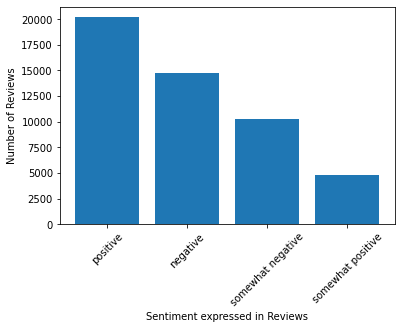

In [35]:
Index = [1,2,3,4]
print(dataFG.Polarity.value_counts())
plt.bar(Index,dataFG.Polarity.value_counts())
plt.xticks(Index,['positive','negative','somewhat negative','somewhat positive'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

# IMPLEMENTATION OF SENTIMENT ANALYSIS

#CLASSIFICATION OF REVIEWS AS POSITIVE AND NEGATIVE 

In [9]:
#Define a function to classify the reviews based on polarity 
def assign_polarity(data):
    if (data['Sentiment'] < '5'):
        return 'neg'
    elif (data['Sentiment'] >= '5'):
        return 'pos'
test_data['sentiment'] = test_data.apply(assign_polarity,axis=1)
train_data['sentiment'] = train_data.apply(assign_polarity,axis=1)


In [10]:
#Assign a sentiment score for the review
def assign_sentiment_score (data):
    if (data['Sentiment'] < '5'):
        return 0
    elif (data['Sentiment'] >= '5'):
        return 1
test_data['polarity'] = test_data.apply(assign_sentiment_score ,axis=1)
train_data['polarity'] = train_data.apply(assign_sentiment_score ,axis=1)
testsample = test_data.copy()
trainsample = train_data.copy()
frames = [testsample, trainsample]
dataF = pd.concat(frames)

# VISUALISATION OF REVIEWS

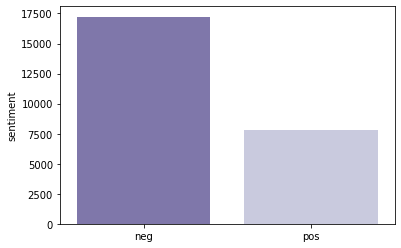

In [11]:
#Visualise the reviews based on the count of values 
sns.barplot(train_data['sentiment'].value_counts().index,
            train_data['sentiment'].value_counts(), palette='Purples_r')
plt.show()

# PREPROCESS THE DATA

In [12]:
#Preprocess the text
#Removing all the special characters 
def preprocess_text(text):
    text = text.lower().strip()
    text = " ".join([w for w in text.split() if len(w) > 2])
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
train_data['review'] = train_data['review'].apply(preprocess_text)
test_data['review'] = test_data['review'].apply(preprocess_text)
print("After removing special characters")
display(train_data.head())
display(test_data.head())


After removing special characters


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,3,story man who has unnatural feelings for pig s...,NaN,NaN,,neg,0
1,10000,4,airport starts brand new luxury plane loaded...,NaN,NaN,,neg,0
2,10001,4,this film lacked something couldnt put finger ...,NaN,NaN,,neg,0
3,10002,1,sorry everyone know this supposed art film but...,NaN,NaN,,neg,0
4,10003,1,when was little parents took along the theater...,NaN,NaN,,neg,0


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,2,once again mr costner has dragged out movie fo...,NaN,NaN,,neg,0
1,10000,4,this example why the majority action films are...,NaN,NaN,,neg,0
2,10001,1,first all hate those moronic rappers who could...,NaN,NaN,,neg,0
3,10002,3,not even the beatles could write songs everyon...,NaN,NaN,,neg,0
4,10003,3,brass pictures movies not fitting word for the...,NaN,NaN,,neg,0


# Tokenisation

In [13]:
#Tokenising the data
tokenized_data = nltk.tokenize.RegexpTokenizer(r'\w+')
train_data['review'] = train_data['review'].apply(tokenized_data.tokenize)
test_data['review'] = test_data['review'].apply(tokenized_data.tokenize)
print("Tokenized reviews:")
display(train_data.head())
display(test_data.head())


Tokenized reviews:


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,3,"[story, man, who, has, unnatural, feelings, fo...",NaN,NaN,,neg,0
1,10000,4,"[airport, starts, brand, new, luxury, plane, l...",NaN,NaN,,neg,0
2,10001,4,"[this, film, lacked, something, couldnt, put, ...",NaN,NaN,,neg,0
3,10002,1,"[sorry, everyone, know, this, supposed, art, f...",NaN,NaN,,neg,0
4,10003,1,"[when, was, little, parents, took, along, the,...",NaN,NaN,,neg,0


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,2,"[once, again, mr, costner, has, dragged, out, ...",NaN,NaN,,neg,0
1,10000,4,"[this, example, why, the, majority, action, fi...",NaN,NaN,,neg,0
2,10001,1,"[first, all, hate, those, moronic, rappers, wh...",NaN,NaN,,neg,0
3,10002,3,"[not, even, the, beatles, could, write, songs,...",NaN,NaN,,neg,0
4,10003,3,"[brass, pictures, movies, not, fitting, word, ...",NaN,NaN,,neg,0


# Removing StopWords 

In [14]:
#Define a function to remove stopwords
def remove_stopwords(text):
    words = [
        w for w in text if w not in stop_words and w in corpus_words or not w.isalpha()]
    words = list(filter(lambda word: words.count(word) >= 2, set(words)))
    return words
corpus_words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
remove = ['movie', 'film', 'one', 'made', 'many', 'time', 'story', 'character', 'still', 'seen', 'picture', 'people', 'see', 'never', 'come',
          'even', 'way', 'plot', 'house', 'horror', 'think', 'make', 'first', 'scene', 'director', 'two', 'show', 'become', 'brother', 'che', 'got', 'ago']
stop_words = stop_words.union(remove)
print("{} stopwordsromved from text".format(len(stop_words)))
print()
train_data['review'] = train_data['review'].apply(remove_stopwords)
test_data['review'] = test_data['review'].apply(remove_stopwords)
print("After removing stopwords:")
display(train_data.head())
display(test_data.head())


211 stopwordsromved from text

After removing stopwords:


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,3,"[absurd, future, turned]",NaN,NaN,,neg,0
1,10000,4,"[oil, like, couple, valuable, airport, either,...",NaN,NaN,,neg,0
2,10001,4,"[leading, dont, love, could]",NaN,NaN,,neg,0
3,10002,1,"[long, excellent, watch]",NaN,NaN,,neg,0
4,10003,1,"[piece, style, psychological, point, everyone,...",NaN,NaN,,neg,0


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,2,"[closet, care]",NaN,NaN,,neg,0
1,10000,4,"[heck, exact, action, new, cube, watching, ice...",NaN,NaN,,neg,0
2,10001,1,"[like, act, except, much, everybody, homeless,...",NaN,NaN,,neg,0
3,10002,3,"[like, acting, everyone, back, turning, walter...",NaN,NaN,,neg,0
4,10003,3,"[brass, really, attractive]",NaN,NaN,,neg,0


# Lemmatization 

In [15]:
#define a function to perform lemmatization
def data_lemmatized(text):
    return [lemmatizer.lemmatize(w) for w in text]
lemmatizer = nltk.stem.WordNetLemmatizer()
train_data['review'] = train_data['review'].apply(data_lemmatized)
test_data['review'] = test_data['review'].apply(data_lemmatized)
display(train_data.head())
display(test_data.head())



,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,3,"[absurd, future, turned]",NaN,NaN,,neg,0
1,10000,4,"[oil, like, couple, valuable, airport, either,...",NaN,NaN,,neg,0
2,10001,4,"[leading, dont, love, could]",NaN,NaN,,neg,0
3,10002,1,"[long, excellent, watch]",NaN,NaN,,neg,0
4,10003,1,"[piece, style, psychological, point, everyone,...",NaN,NaN,,neg,0


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,2,"[closet, care]",NaN,NaN,,neg,0
1,10000,4,"[heck, exact, action, new, cube, watching, ice...",NaN,NaN,,neg,0
2,10001,1,"[like, act, except, much, everybody, homeless,...",NaN,NaN,,neg,0
3,10002,3,"[like, acting, everyone, back, turning, walter...",NaN,NaN,,neg,0
4,10003,3,"[brass, really, attractive]",NaN,NaN,,neg,0


# Removing Rare Words

In [16]:
#Find all the rare words and remove them
def rarewords_removal(text, r_words):
    removed_rare_words = list(set(text) - set(r_words))
    return removed_rare_words
def find_r_words(data_fr):
    review_exploded = data_fr.explode('review')
    word_counts = review_exploded.review.value_counts(ascending=True)
    r_words = word_counts[word_counts <= 5].index.to_list()
    data_fr['review'] = data_fr['review'].apply(
        lambda x: rarewords_removal(x, r_words))
    print("Before:", review_exploded.shape[0], "\nAfter:", data_fr.explode(
        'review').shape[0])
    return data_fr
print("Rare words removed from training data")
train_data = find_r_words(train_data)
print()
print("Rare words  removed from test data")
test_data = find_r_words(test_data)


Rare words removed from training data
Before: 196213 
After: 184125

Rare words  removed from test data
Before: 191740 
After: 179868


In [17]:
#Remove all the empty reviews
def remove_empty_rev(df):
    df = df.drop(df[~df.review.astype(bool)].index)
    return df
train_data = remove_empty_rev(train_data)
test_data = remove_empty_rev(test_data)
frames = [train_data, test_data]
dataF = pd.concat(frames)
print('Cleaned data after preprocessing:')
train_data.loc[train_data['sentiment'] == 'pos']


Cleaned data after preprocessing:


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
12500,0,9,"[high, student, school]",NaN,NaN,,pos,1
12501,10000,8,"[losing, used, molly, next, work, help, matter...",NaN,NaN,,pos,1
12503,10002,7,"[realistic, gave, lead, view]",NaN,NaN,,pos,1
12504,10003,8,"[warren, good, could]",NaN,NaN,,pos,1
12505,10004,8,"[drama, felt, thriller, though, like, robin]",NaN,NaN,,pos,1
...,...,...,...,...,...,...,...,...
24987,9990,8,"[son, like, stone, angel, life, hard, understa...",NaN,NaN,,pos,1
24993,9996,9,"[impact, true]",NaN,NaN,,pos,1
24994,9997,7,"[rich, man, homeless, life, mel, like, find]",NaN,NaN,,pos,1
24995,9998,9,"[lot, didnt]",NaN,NaN,,pos,1


In [18]:
#Calculate and populate the dictionary
def calculate_prob(train):
    wordcount = {}
    
    pos_doc = train[train.sentiment == "pos"]
    no_pos_doc = pos_doc.shape[0]
    neg_doc = train[train.sentiment == "neg"]
    no_neg_doc = neg_doc.shape[0]
    for row in train.itertuples():
        review = row.review
        for word in review:
            word_sen = None
            word_neg_sen = None
            if word in wordcount.keys():
                word_sen = wordcount[word]['p_pos']
                word_neg_sen = wordcount[word]['p_neg']
            else:
                no_doc_pos_sent = pos_doc[pos_doc.review.apply(lambda x: bool(set(x) & {word}))].shape[0]
                no_doc_neg_sent = neg_doc[neg_doc.review.apply(lambda x: bool(set(x) & {word}))].shape[0]
                
                word_sen = round(no_doc_pos_sent / no_pos_doc, 4)
                word_neg_sen = round(no_doc_neg_sent / no_neg_doc, 4)
                
                wordcount[word] = {'p_pos': word_sen, 'p_neg': word_neg_sen}
    return wordcount
def predict_sent(train, test, smoothing=False):
    print("Processing")
    
    word_prob_train = calculate_prob(train)
    correct = 0
    smooth_parameter = 0
    if smoothing:
        smooth_parameter = 1 /             train_data.explode('review').review.shape[0]
    for row in test.itertuples():
        review = row.review
        tot_pos_prob = 1.0
        tot_neg_prob = 1.0
        for word in review:
            word_sen = 0.0
            word_neg_sen = 0.0
            
            if word in word_prob_train.keys():
                probs_word = word_prob_train[word]
                word_sen = probs_word['p_pos']
                word_neg_sen = probs_word['p_neg']
            
            tot_pos_prob = tot_pos_prob * (word_sen + smooth_parameter)
            tot_neg_prob = tot_neg_prob * (word_neg_sen + smooth_parameter)
        total_train_docs = train.shape[0]
    
        no_pos_doc = train[train.sentiment == "pos"].shape[0]
        no_neg_doc = train[train.sentiment == "neg"].shape[0]
        
        p_pos_sent = round(no_pos_doc / total_train_docs, 4)
        p_neg_sent = round(no_neg_doc / total_train_docs, 4)
        
        tot_pos_prob = p_pos_sent * tot_pos_prob
        tot_neg_prob = p_neg_sent * tot_neg_prob
        predicted_sent = 0
        if tot_pos_prob > tot_neg_prob:
            predicted_sent = "pos"
        elif tot_pos_prob < tot_neg_prob:
            predicted_sent = "neg"
        if row.sentiment == predicted_sent:
            correct += 1
           
        test.at[row.Index, 'p_pos'] = tot_pos_prob
        test.at[row.Index, 'p_neg'] = tot_neg_prob
        test.at[row.Index, 'predicted_sentiment'] = predicted_sent
    nb_accuracy = round(correct / test.shape[0] * 100, 2)
    print("Accuracy: {}%".format(nb_accuracy))
    return
print("Predicting the sentiment of review using Naive Bayes Classifer")
print()
predict_sent(train_data, test_data)
display(test_data.head(10))
test_data.loc[test_data['sentiment'] == 'pos']


Predicting the sentiment of review using Naive Bayes Classifer

Processing
Accuracy: 56.03%


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
0,0,2,"[care, closet]",4.017920e-07,1.701528e-06,neg,neg,0
1,10000,4,"[worth, better, watching, exact, heck, ice, bi...",1.612084e-25,4.655115e-25,neg,neg,0
2,10001,1,"[everybody, act, homeless, except, guy, much, ...",3.904809e-16,2.495248e-15,neg,neg,0
3,10002,3,"[back, walter, guy, everyone, like, turning, a...",3.993641e-16,8.493052e-15,neg,neg,0
4,10003,3,"[attractive, really]",3.729132e-05,4.511794e-05,neg,neg,0
5,10004,2,"[funny, hand]",3.891418e-05,1.009596e-04,neg,neg,0
6,10005,2,[blood],1.820620e-03,5.694630e-03,neg,neg,0
7,10006,2,"[fan, really]",3.525725e-04,5.639742e-04,neg,neg,0
8,10007,4,"[cast, walk, get, talk]",2.445120e-09,5.749934e-09,neg,neg,0
9,10008,4,[hair],5.964100e-04,9.605400e-04,neg,neg,0


,reviewId,Sentiment,review,p_pos,p_neg,predicted_sentiment,sentiment,polarity
12502,10000,7,"[opening, u, family, golf, also, open, sport, ...",0.000000e+00,0.000000e+00,0,pos,1
12503,10001,9,"[however, class, golf, history, little, well, ...",0.000000e+00,0.000000e+00,0,pos,1
12504,10002,8,"[good, well, job]",1.123672e-04,3.783688e-05,pos,pos,1
12505,10003,8,"[old, class, golf, great, acting]",0.000000e+00,0.000000e+00,0,pos,1
12506,10004,9,"[u, working, moving, world, truly, class, golf...",0.000000e+00,0.000000e+00,0,pos,1
...,...,...,...,...,...,...,...,...
24989,9991,8,"[harry, class, life, work, sport, idol, ever, ...",0.000000e+00,0.000000e+00,0,pos,1
24993,9995,8,"[cinema, entire, harry, looking, really, suppo...",0.000000e+00,0.000000e+00,0,pos,1
24996,9998,8,[well],3.346174e-02,4.123461e-02,neg,pos,1
24998,999,8,"[sent, gritty, perhaps, miller, bad, romance, ...",0.000000e+00,0.000000e+00,0,pos,1


In [95]:
#Smoothing to increase the accuracy of the algorthm
print("Predicting the sentiment of review using Naive Bayes Classifer with smoothing")
print()
predict_sent(train_data, test_data, smoothing=True)


Predicting the sentiment of review using Naive Bayes Classifer with smoothing

Processing
Accuracy: 72.61%


In [19]:
#Verifiying the accuracy using cross validation

def cross_validation(train, k, smoothing=False):
    kcross = 1/k
    for i in range(1, k + 1):
        kcross_data = train.sample(
            frac=kcross, replace=False, random_state=i).copy(deep=True)
        train_data = train.drop(kcross_data.index, axis=0).copy(deep=True)
        if smoothing:
            print("Cross-validation Pass", i, "with smoothing")
        else:
            print("Cross-validation Pass", i)
        predict_sent(train_data, kcross_data, smoothing)
        print()
    return

cross_validation(train_data, 5, smoothing=True)


Cross-validation Pass 1 with smoothing
Processing
Accuracy: 69.87%

Cross-validation Pass 2 with smoothing
Processing
Accuracy: 69.95%

Cross-validation Pass 3 with smoothing
Processing
Accuracy: 68.34%

Cross-validation Pass 4 with smoothing
Processing
Accuracy: 69.16%

Cross-validation Pass 5 with smoothing
Processing
Accuracy: 68.92%



# Implementing Suggestive Classification Reviews 

In [20]:
import csv
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
from nltk.corpus import stopwords 


In [25]:
in_path = "D:/Subjects/Subjects/ML/Project/aclImdb/suggestions1.csv"
out_path = "D:/Subjects/Subjects/ML/Project/aclImdb/suggestions2.csv"

In [26]:

def classify_sentiment(sen_list):
    
    bag_oF_wrds = ["suggest","recommend","hopefully","go for","request","it would be nice","adding","should come with","should be able","could come with", "i need" , "we need","needs", "would like to","would love to","allow","add"]

    
    strng_pattern = [r'.*would\slike.*if.*', r'.*i\swish.*', r'.*i\shope.*', r'.*i\swant.*', r'.*hopefully.*',
                       r".*if\sonly.*", r".*would\sbe\sbetter\sif.*", r".*should.*", r".*would\sthat.*",
                       r".*can't\sbelieve.*didn't.*", r".*don't\sbelieve.*didn't.*", r".*do\swant.*", r".*i\scan\shas.*"]
    patterns = []
    for p in strng_pattern:
        patterns.append(re.compile(p))


    list_lab = []
    for sent in sen_list:
        sent_tokenised = word_tokenize(sent[1])
        sent_tag = nltk.pos_tag(sent_tokenised)
        tags = [i[1] for i in sent_tag]
        label = 0
        pattern_matched = False
        for patterns_compiled in patterns:
            joined_sent = " ".join(sent_tokenised)
            matches = patterns_compiled.findall(joined_sent)
            if len(matches) > 0:
                pattern_matched = True
        k_match = any(elem in bag_oF_wrds for elem in sent_tokenised)
        pos_match = any(elem in ['MD', 'VB'] for elem in tags)
        if pattern_matched:
            label = 1
        elif k_match == True:
                label = 1
        elif pos_match == True:
                label = 1    
        list_lab.append(label)
    return list_lab

#This reads CSV a given CSV and stores the data in a list
def read_csv(in_path):
    read_file = csv.reader(open(in_path,"rt", errors="ignore",encoding="utf-8"), delimiter=',')
    sen_list = []

    for row in read_file:
        id = row[0]
        sent = row[1]
        sen_list.append((id,sent))
    return sen_list

#This will create and write into a new CSV
def write_csv(sen_list, list_lab, out_path):
        write_file = csv.writer(open(out_path, "w",encoding="utf-8"))
        write_file.writerow(["id","Sentence","Prediction"])
        c = 0
        data = [[id, sent, label] for ((id, sent), label) in zip(sen_list, list_lab)]
        write_file.writerows(data)


In [27]:
sen_list = read_csv(in_path)
list_lab = classify_sentiment(sen_list)
write_csv(sen_list, list_lab, out_path)
df_sug = pd.read_csv(out_path) #Read the predicted data from csv
df_sug.head()



,id,Sentence,Prediction
0,9566,This would enable live traffic aware apps.,1
1,9569,Please try other formatting like bold italics ...,1
2,9576,Since computers were invented to save time I s...,1
3,9577,Allow rearranging if the user wants to change ...,1
4,9579,Add SIMD instructions for better use of ARM NE...,0


<AxesSubplot:>

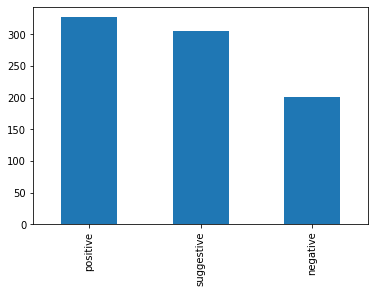

In [28]:
#visualise the number of positive ,negative ,suggestive reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
scores=[] 
for sentence in df_sug.Sentence:
    scores.append(sid.polarity_scores(str(sentence)))
df_sug["polarity"]="neutral"
y=[]
for sent in scores:
    if sent["compound"] == 0:
        y.append("positive")
    elif sent["compound"] > 0:
        y.append('suggestive')
    else:
        y.append('negative')
y
df_sug["polarity"]= y
x1= df_sug["polarity"].value_counts()
x1.plot(kind="bar")


In [29]:
df_sug=df_sug[df_sug["Prediction"]==1] 
print("PREDICTION MADE: ")
print(df_sug)


PREDICTION MADE: 
       id                                           Sentence  Prediction  \
0    9566         This would enable live traffic aware apps.           1   
1    9569  Please try other formatting like bold italics ...           1   
2    9576  Since computers were invented to save time I s...           1   
3    9577  Allow rearranging if the user wants to change ...           1   
5    9580  Also using a hot swapping code generator (opti...           1   
..    ...                                                ...         ...   
825  6313  Watching my app analytics I see *FAR* more dev...           1   
827  6334  When Microsoft sends a money between the compa...           1   
828  6340                        It could be something like:           1   
830  6351                 it would be very very appreciated!           1   
832  6358  I just chatted to support they told me that it...           1   

       polarity  
0      positive  
1    suggestive  
2    suggestive

# Calculating accuracies for different algorithms

In [11]:
#CreaTe a dataframe
df = trainsample.rename(columns={"reviewId": "Id", "Sentiment": "Sentiment", "review": "Phrase"})
df_test = testsample.rename(columns={"reviewId": "Id", "Sentiment": "Sentiment", "review": "Phrase"})

In [12]:
#PREPROCESS AND TOKENIZE

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(df['Phrase'].values) + list(df_test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['Phrase'])
test_vectorized = vectorizer.transform(df_test['Phrase'])

print("Train set dimensions after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

X = train_vectorized
y = df.Sentiment.values


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# split the data into 80:20 for training and validating.
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

ml_default_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB', 'MultinomialNB', 'KNeighborsClassifier'])



Train set dimensions after applying TF-IDF vectorizer:


# LOGISTIC REGRESSION

 Using multinomial Logistic Regression 
              precision    recall  f1-score   support

           1       0.44      0.92      0.60      1020
          10       0.40      0.87      0.55       946
           2       1.00      0.00      0.00       457
           3       0.50      0.01      0.02       484
           4       0.42      0.20      0.27       539
           7       0.47      0.13      0.20       499
           8       0.34      0.24      0.28       602
           9       1.00      0.00      0.01       453

    accuracy                           0.42      5000
   macro avg       0.57      0.30      0.24      5000
weighted avg       0.53      0.42      0.31      5000


accuracy_score 0.4162

Weighted Averaged validation metrics
precision_score 0.529599022592776
recall_score 0.4162
f1_score 0.3109147266487787



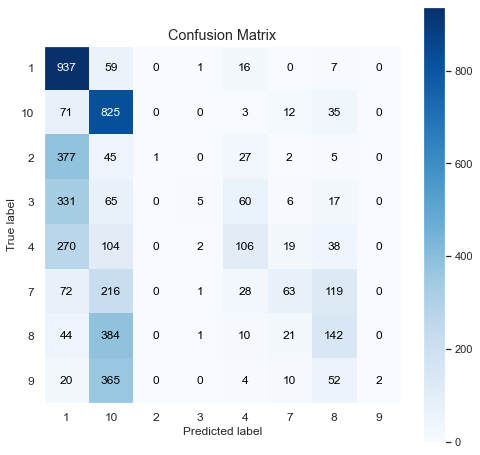

In [13]:

from sklearn.linear_model import LogisticRegression

start_time = time.time()

clf_logistic_regression = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
clf_logistic_regression.fit(xtrain, ytrain)
predictions = clf_logistic_regression.predict(xvalid)
print(" Using multinomial Logistic Regression ")
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


ml_default_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, predictions, average='micro')



# DECISION TREE

In [ ]:

from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
    
print()
print("Using DecisionTreeClassifier, with train-test split:")

clf_DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
clf_DecisionTreeClassifier.fit(xtrain, ytrain)
predictions = clf_DecisionTreeClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')




Using DecisionTreeClassifier, with train-test split:


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

start_time = time.time()
    
print()
print("Using ExtraTreesClassifier with train-test split:")

clf_ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=10, random_state=42)
clf_ExtraTreesClassifier.fit(xtrain, ytrain)
predictions = clf_ExtraTreesClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
    
print()
print("Using RandomForestClassifier with train-test split:")

clf_RandomForestClassifier = RandomForestClassifier(n_estimators = 10, random_state=42)
clf_RandomForestClassifier.fit(xtrain, ytrain)
predictions = clf_RandomForestClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['RandomForestClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['RandomForestClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['RandomForestClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import LinearSVC

start_time = time.time()
    
print()
print("Using LinearSVC, multi_class='ovr', with train-test split:")

clf_LinearSVC = LinearSVC(multi_class='ovr', random_state=42)
clf_LinearSVC.fit(xtrain, ytrain)
predictions = clf_LinearSVC.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)



# BERNOULLI NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
    
print()
print("Using BernoulliNB with train-test split:")

clf_BernoulliNB = BernoulliNB()
clf_BernoulliNB.fit(xtrain, ytrain)
predictions = clf_BernoulliNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['BernoulliNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['BernoulliNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['BernoulliNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)



# MULTINOMIAL NAIVE BAYES 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
    
print()
print("Using MultinomialNB with train-test split:")

clf_MultinomialNB = MultinomialNB()
clf_MultinomialNB.fit(xtrain, ytrain)
predictions = clf_MultinomialNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['MultinomialNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['MultinomialNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['MultinomialNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


# K-NEAREST NEIGHBORS 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

clfKnn = KNeighborsClassifier()
clfKnn.fit(xtrain, ytrain)
predictions = clfKnn.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['KNeighborsClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)
